<a href="https://colab.research.google.com/github/rida-manzoor/DL/blob/main/22_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Long Short Term Memory(LSTM)



*  Defination
*  Problem with RNN
*  Architecture

* Reference





LSTM is a type of recurrent neural network (RNN) architecture designed to address the vanishing and exploding gradient problems in traditional RNNs. It is well-suited for processing and making predictions based on sequences of data, such as time series data, natural language, and more.


LSTM networks were designed by Sepp Hochreiter and Jürgen Schmidhuber in 1997. They introduced LSTM in a paper titled "[Long Short-Term Memory](https://blog.xpgreat.com/file/lstm.pdf)" published in the journal *Neural Computation* (Volume 9, Issue 8, pages 1735-1780). This paper outlined the architecture and benefits of LSTM networks, highlighting their ability to overcome the vanishing gradient problem in traditional recurrent neural networks (RNNs) and handle long-range dependencies in sequential data.

## Problem with RNN

The main problem with traditional Recurrent Neural Networks (RNNs) is the vanishing gradient problem. In RNNs, during training, gradients tend to either vanish (become extremely small) or explode (become extremely large) as they are back-propagated through time. This occurs because of the repeated multiplication of gradients through the weight matrices in the network during backpropagation.

When gradients vanish, the model struggles to learn long-term dependencies in sequences. Essentially, information from earlier time steps becomes increasingly diluted or lost as it is propagated through time, making it difficult for the model to capture long-range dependencies. This limitation severely hampers the performance of RNNs in tasks where understanding context over longer sequences is crucial, such as natural language processing (NLP) tasks like language translation or sentiment analysis.

![RNN](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-rolled.png)

As we know we have to assign weight to feedback loop.
- COnsider if weight is 2 and we replicate that steps 70 times(Because we have 70 rows in stock prediction data)

 $$      weight^(70)   $$
  $$      2^(70)   $$
    so gradient will explode in this case.




In RNN, hidden state only retain past data

# Architecture

LSTM has following three gates:
1. Forget Gate
2. Input Gate
3. Output Gate

Before we see it's architecture we should know what goes in as input and exactly we get as an output from a particular cell in LSTM architecture at a given time step.

- Input:
     * Previous Cell State
     * Previous Hidden State
     * Input from current timestep
- Output
     * Current Hidden State
     * Current Cell State
- |=|
     * Update Cell State
     * Calculate h_t

![LSTM](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png)

In the above diagram, each line carries an entire vector, from the output of one node to the inputs of others. The pink circles represent pointwise operations, like vector addition, while the yellow boxes are learned neural network layers. Lines merging denote concatenation, while a line forking denote its content being copied and the copies going to different locations. Number of nodes in each neural netwrok layer is hyperparameter. More over all vectors will be of same shape and dimensions.



Gates has the ability to add or delete some information from cell state.

## 1. Forget Gate
![forget Gate](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-f.png)

Forget gate decides which information should be deleted from cell state.
Assume we have 3 nodes of sigmoid neural network. And Input looks like:
$$
x_t = [x_i1, x_i2, x_i3, x_i4]
$$

$$c_t,h_t$$ dimension will be 3 same as no. of nodes.

Now we have to caluclate:
1. $$f_t$$
2. $$c_(t-1) x f_t$$

Where, we can say second step is removal operation. It decides which information to keep and which to delete. In this particular setup, we will have total 21 weights.

$$f_t=[f_1,f_2,f_3]$$
$$w=(3,7)$$

Now, we will see how shape of all vectors is like:
$$f_t=σ(w_f[h_t-1,x_t] +b_f)$$

where
$$
w_f=(3,7)$$
$$
[h_t-1,x_t] =(7,1)
$$
where there product will be equal to (3,1)
$$b_f=(3,1)$$
$$(3,1)+(3,1)=(3,1)$$

## Input Gate
This gate add some new input
![Input](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-i.png)

Here, we have to calculate:
1. c_t-1 Candidate cell state
2. i_t Fitering
3. c_t current cell state



## Output Gate

This gate tells us what exactly will be the output.
![output](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-o.png)

Firstly, it will calculate output using sigmoid and then it will apply tanh to keep them in range of [-1,1].

Now we will take same dataset which we use for RNN and apply LSTM and see if the results vary or not.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("NFLX.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [3]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime format if needed
df.set_index('Date', inplace=True)

# References
- https://blog.xpgreat.com/file/lstm.pdf
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
result = seasonal_decompose(df['Volume'], period=12)

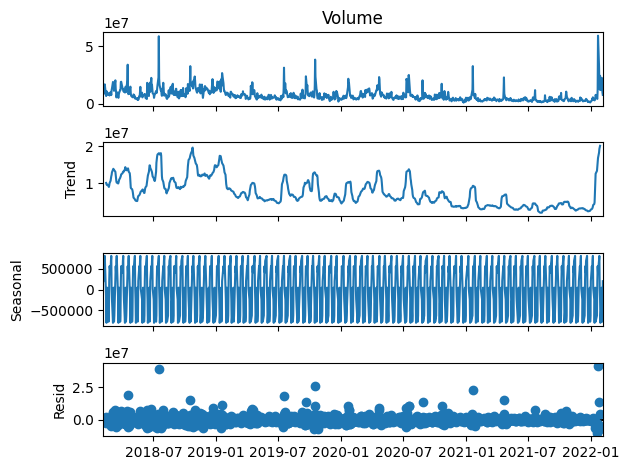

In [6]:
result.plot();

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df1 = df[['Volume']]

# Displaying the subsetted DataFrame
print(df1.head())

              Volume
Date                
2018-02-05  11896100
2018-02-06  12595800
2018-02-07   8981500
2018-02-08   9306700
2018-02-09  16906900


In [6]:
split_index = int(len(df1) * 0.8)  # split index for an 80-20 split
train = df1.iloc[:split_index]
test = df1.iloc[split_index:]

# Print the shapes of the training and testing sets
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

Training set shape: (807, 1)
Testing set shape: (202, 1)


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [9]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [10]:
scaled_train

array([[0.18775582],
       [0.19997416],
       [0.13686036],
       [0.14253908],
       [0.27525565],
       [0.12906172],
       [0.09973038],
       [0.17161896],
       [0.16791172],
       [0.12517637],
       [0.11568738],
       [0.14366365],
       [0.13528876],
       [0.10752902],
       [0.15933602],
       [0.14445644],
       [0.11367049],
       [0.18838446],
       [0.21306211],
       [0.31156315],
       [0.30352528],
       [0.27918989],
       [0.17804681],
       [0.23322926],
       [0.33571518],
       [0.20558652],
       [0.16294197],
       [0.0785609 ],
       [0.10808607],
       [0.15333948],
       [0.08465523],
       [0.07194271],
       [0.12082652],
       [0.14643665],
       [0.18936584],
       [0.19076806],
       [0.31133265],
       [0.31434663],
       [0.21411858],
       [0.20170466],
       [0.20553064],
       [0.16608692],
       [0.17987511],
       [0.15208918],
       [0.16617947],
       [0.23981602],
       [0.15900074],
       [0.190

In [11]:
n_input = 3
n_features=1
generator = TimeseriesGenerator(scaled_train,scaled_train, length=n_input, batch_size=1)

In [12]:
x,y=generator[0]
print(f'Given the Array: \n{x.flatten()}')
print(f'Predict this y: \n{y}')

Given the Array: 
[0.18775582 0.19997416 0.13686036]
Predict this y: 
[[0.14253908]]


In [13]:
# Now we will make a generator for timesteps of 12 months

n_input=12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


In [18]:
# Assuming 'scaled_test' contains your scaled test data
generator_test = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=1)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [15]:
model = Sequential()

model.add(LSTM(units=64, activation='relu', input_shape=(n_input, n_features)))

# Add a Dense layer
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
history = model.fit(generator, epochs=20, validation_data=generator_test)

Epoch 1/20
795/795 [==============================] - 7s 7ms/step - loss: 0.0059 - mae: 0.0486 - val_loss: 0.0074 - val_mae: 0.0557
Epoch 2/20
795/795 [==============================] - 5s 7ms/step - loss: 0.0050 - mae: 0.0452 - val_loss: 0.0066 - val_mae: 0.0485
Epoch 3/20
795/795 [==============================] - 8s 10ms/step - loss: 0.0049 - mae: 0.0444 - val_loss: 0.0059 - val_mae: 0.0372
Epoch 4/20
795/795 [==============================] - 6s 8ms/step - loss: 0.0046 - mae: 0.0429 - val_loss: 0.0062 - val_mae: 0.0442
Epoch 5/20
795/795 [==============================] - 7s 9ms/step - loss: 0.0046 - mae: 0.0424 - val_loss: 0.0058 - val_mae: 0.0405
Epoch 6/20
795/795 [==============================] - 6s 7ms/step - loss: 0.0046 - mae: 0.0429 - val_loss: 0.0057 - val_mae: 0.0374
Epoch 7/20
795/795 [==============================] - 5s 7ms/step - loss: 0.0045 - mae: 0.0416 - val_loss: 0.0054 - val_mae: 0.0327
Epoch 8/20
795/795 [==============================] - 6s 7ms/step - loss: 0

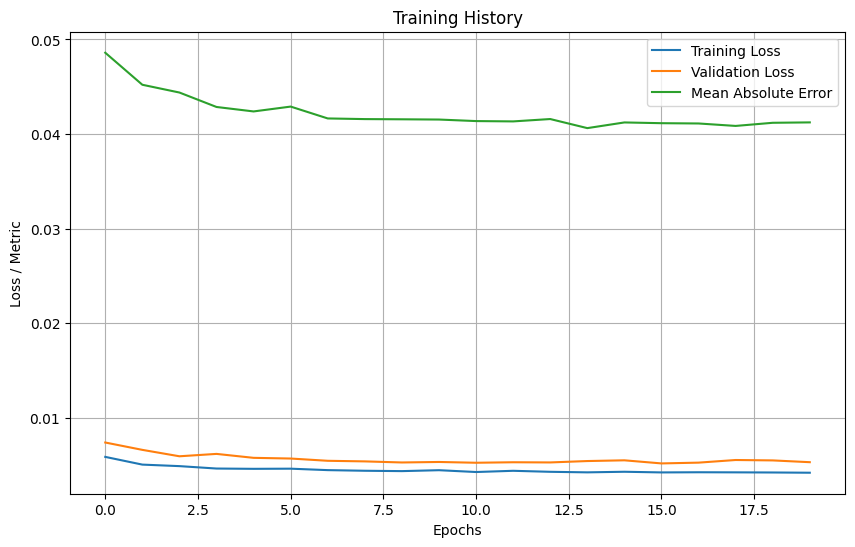

In [23]:
from matplotlib import pyplot as plt

# Plotting the training history
plt.figure(figsize=(10, 6))

# Plotting training loss
plt.plot(history.history['loss'], label='Training Loss')

if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')

if 'mae' in history.history:
     plt.plot(history.history['mae'], label='Mean Absolute Error')

plt.xlabel('Epochs')
plt.ylabel('Loss / Metric')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
# Evaluate the model on the test data
mse = model.evaluate(generator_test)[1]

print(f'Mean Squared Error (MSE) on Test Data: {mse}')

190/190 [==============================] - 1s 4ms/step - loss: 0.0053 - mae: 0.0274
Mean Squared Error (MSE) on Test Data: 0.02738037332892418
